In [3]:
# Crank Nicolson Method for Unsteady Heat Equation
# Shared online by Pioneer of Success
#Email: pioneerofsuccess2020@gmail.com
# Disclaimer: The codes are developed taking help from various online free resources, we do not claim copyright for this code. 

# Required Libraries
# numpy library for matrix and vectors
import numpy as np
# library for mathematical functions
import math 

# Libraries required for plotting and manipulations 
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import warnings
warnings.filterwarnings("ignore")

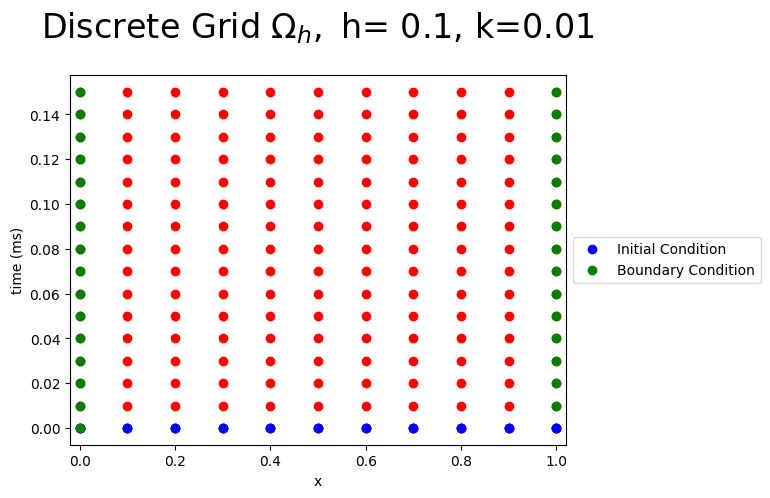

In [4]:
N=10 # number of divisions in spatial direction 
Nt=100 # number of divisions in time directions 
h=1/N  # each division in space (deltax)
k=1/Nt # each division in time 
r=k/(h*h) # coefficient 
time_steps=15 # code will be solved for 15 time steps 
time=np.arange(0,(time_steps+.5)*k,k) # linear array creation for time
x=np.arange(0,1.0001,h) #linear array for space 
X, Y = np.meshgrid(x, time)
fig = plt.figure()
plt.plot(X,Y,'ro');
plt.plot(x,0*x,'bo',label='Initial Condition');
plt.plot(np.ones(time_steps+1),time,'go',label='Boundary Condition');
plt.plot(x,0*x,'bo');
plt.plot(0*time,time,'go');
plt.xlim((-0.02,1.02))
plt.xlabel('x')
plt.ylabel('time (ms)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(r'Discrete Grid $\Omega_h,$ h= %s, k=%s'%(h,k),fontsize=24,y=1.08)
plt.show();

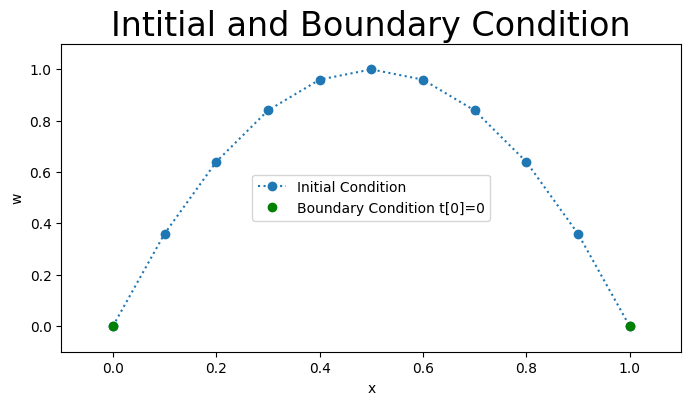

In [5]:
#This part defines the initial and boundary conditions
w=np.zeros((N+1,time_steps+1))
b=np.zeros(N-1)
# Initial Condition
for i in range (1,N):
    w[i,0]=4*x[i]-4*x[i]*x[i]
   # if x[i]>0.5:
      #  w[i,0]=2*(1-x[i])
    

# Boundary Condition
for k in range (0,time_steps):
    w[0,k]=0
    w[N,k]=0
    
fig = plt.figure(figsize=(8,4))
plt.plot(x,w[:,0],'o:',label='Initial Condition')
plt.plot(x[[0,N]],w[[0,N],0],'go',label='Boundary Condition t[0]=0')
#plt.plot(x[N],w[N,0],'go')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.title('Intitial and Boundary Condition',fontsize=24)
plt.xlabel('x')
plt.ylabel('w')
plt.legend(loc='best')
plt.show()


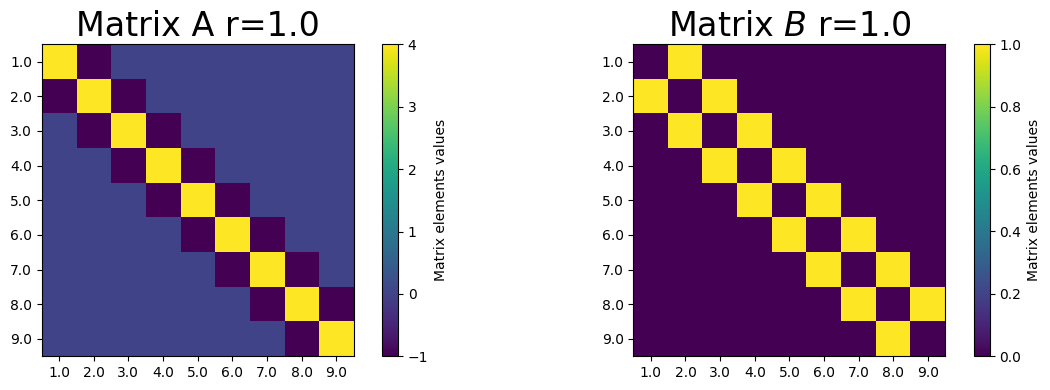

In [8]:
A=np.zeros((N-1,N-1))
B=np.zeros((N-1,N-1))

#defining the main diagonal 
for i in range (0,N-1):
    A[i,i]=2+2*r
    B[i,i]=2-2*r

#defining the other two diagonals
for i in range (0,N-2):           
    A[i+1,i]=-r
    A[i,i+1]=-r
    B[i+1,i]=r
    B[i,i+1]=r
    
Ainv=np.linalg.inv(A) # calculation of A inverse  
fig = plt.figure(figsize=(12,4));
plt.subplot(121)
plt.imshow(A,interpolation='none');
plt.xticks(np.arange(N-1), np.arange(1,N-0.9,1));
plt.yticks(np.arange(N-1), np.arange(1,N-0.9,1));
clb=plt.colorbar();
clb.set_label('Matrix elements values');
#clb.set_clim((-1,1));
plt.title('Matrix A r=%s'%(np.round(r,3)),fontsize=24)

plt.subplot(122)
plt.imshow(B,interpolation='none');
plt.xticks(np.arange(N-1), np.arange(1,N-0.9,1));
plt.yticks(np.arange(N-1), np.arange(1,N-0.9,1));
clb=plt.colorbar();
clb.set_label('Matrix elements values');
#clb.set_clim((-1,1));
plt.title(r'Matrix $B$ r=%s'%(np.round(r,3)),fontsize=24)
fig.tight_layout()
plt.show();




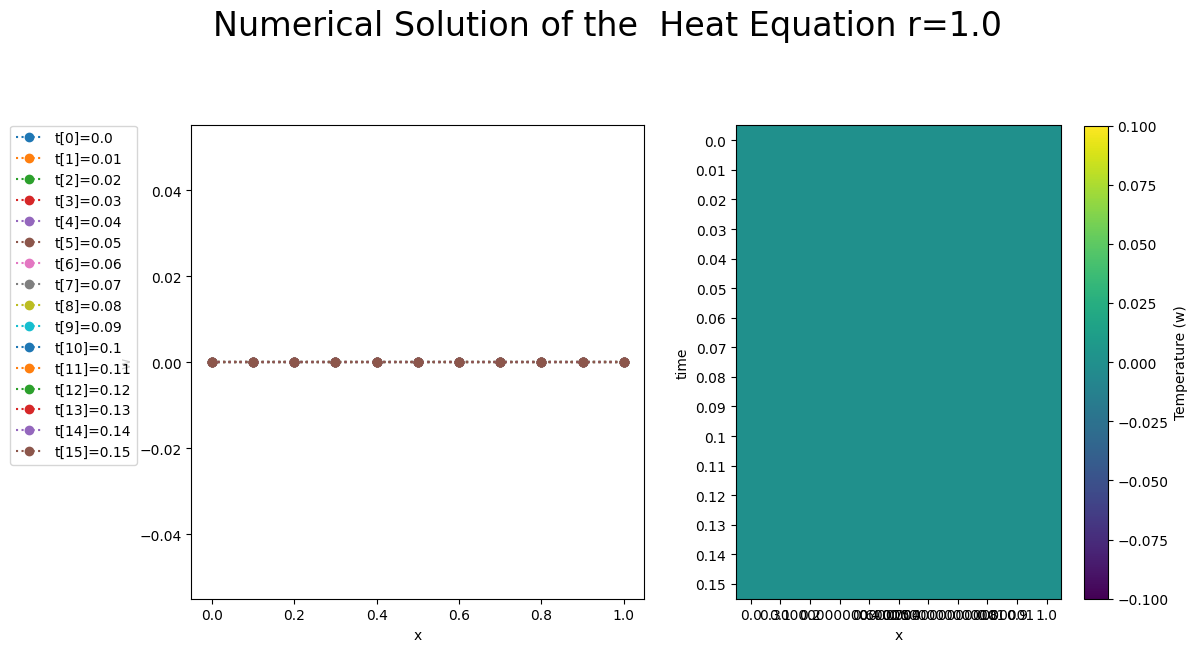

In [7]:
fig = plt.figure(figsize=(12,6))
plt.subplot(121)
for j in range (0,time_steps+1):
    b[0]=r*w[0,j-1]+r*w[0,j]
    b[N-2]=r*w[N,j-1]+r*w[N,j]
    v=np.dot(B,w[1:(N),j-1])
    w[1:(N),j]=np.dot(Ainv,v+b)
    plt.plot(x,w[:,j],'o:',label='t[%s]=%s'%(j,time[j]))
plt.xlabel('x')
plt.ylabel('w')
#plt.legend(loc='bottom', bbox_to_anchor=(0.5, -0.1))
plt.legend(bbox_to_anchor=(-.4, 1), loc=2, borderaxespad=0.)

plt.subplot(122)
plt.imshow(w.transpose())
plt.xticks(np.arange(len(x)), x)
plt.yticks(np.arange(len(time)), time)
plt.xlabel('x')
plt.ylabel('time')
clb=plt.colorbar()
clb.set_label('Temperature (w)')
plt.suptitle('Numerical Solution of the  Heat Equation r=%s'%(np.round(r,3)),fontsize=24,y=1.08)
fig.tight_layout()
plt.show()